In [4]:
pwd

'/Users/baghyeongyu/Data_CNH/Data/Fig.4/b/DFT'

In [8]:
pwd

'/Users/baghyeongyu/Data_CNH/Data/Fig.4/b'

## Fig. 5(a)

 
 ### ./01/OUTCAR
 ### ./02/OUTCAR
 ### ./03/OUTCAR
 ### ./04/OUTCAR
 ### ./05/OUTCAR
 ### ./06/OUTCAR
 ### ./07/OUTCAR
 ### ./08/OUTCAR
 ### ./09/OUTCAR
  [-101.8646921, -101.87134342, -101.47837959, -103.5662227, -103.56734225, -103.5867184, -103.70342062, -103.78964809, -103.79513873]

 - Are you going to plot a graph including the energies of the initial state and the final state?

 [-101.89, -101.8646921, -101.87134342, -101.47837959, -103.5662227, -103.56734225, -103.5867184, -103.70342062, -103.78964809, -103.79513873, -103.813]
 
 ### ./01/OUTCAR
 ### ./02/OUTCAR
 ### ./03/OUTCAR
 ### ./04/OUTCAR
 ### ./05/OUTCAR
 ### ./06/OUTCAR
 ### ./07/OUTCAR
 ### ./08/OUTCAR
 ### ./09/OUTCAR
  [-101.8646921, -101.87134342, -101.47837959, -103.5662227, -103.56734225, -103.5867184, -103.70342062, -103.78964809, -103.79513873]

 - Are you going to plot a graph including the energies of the initial state and the final state?

 [-101.90625964924551, -101.8646921, -101.87134342, -101.47837959, 

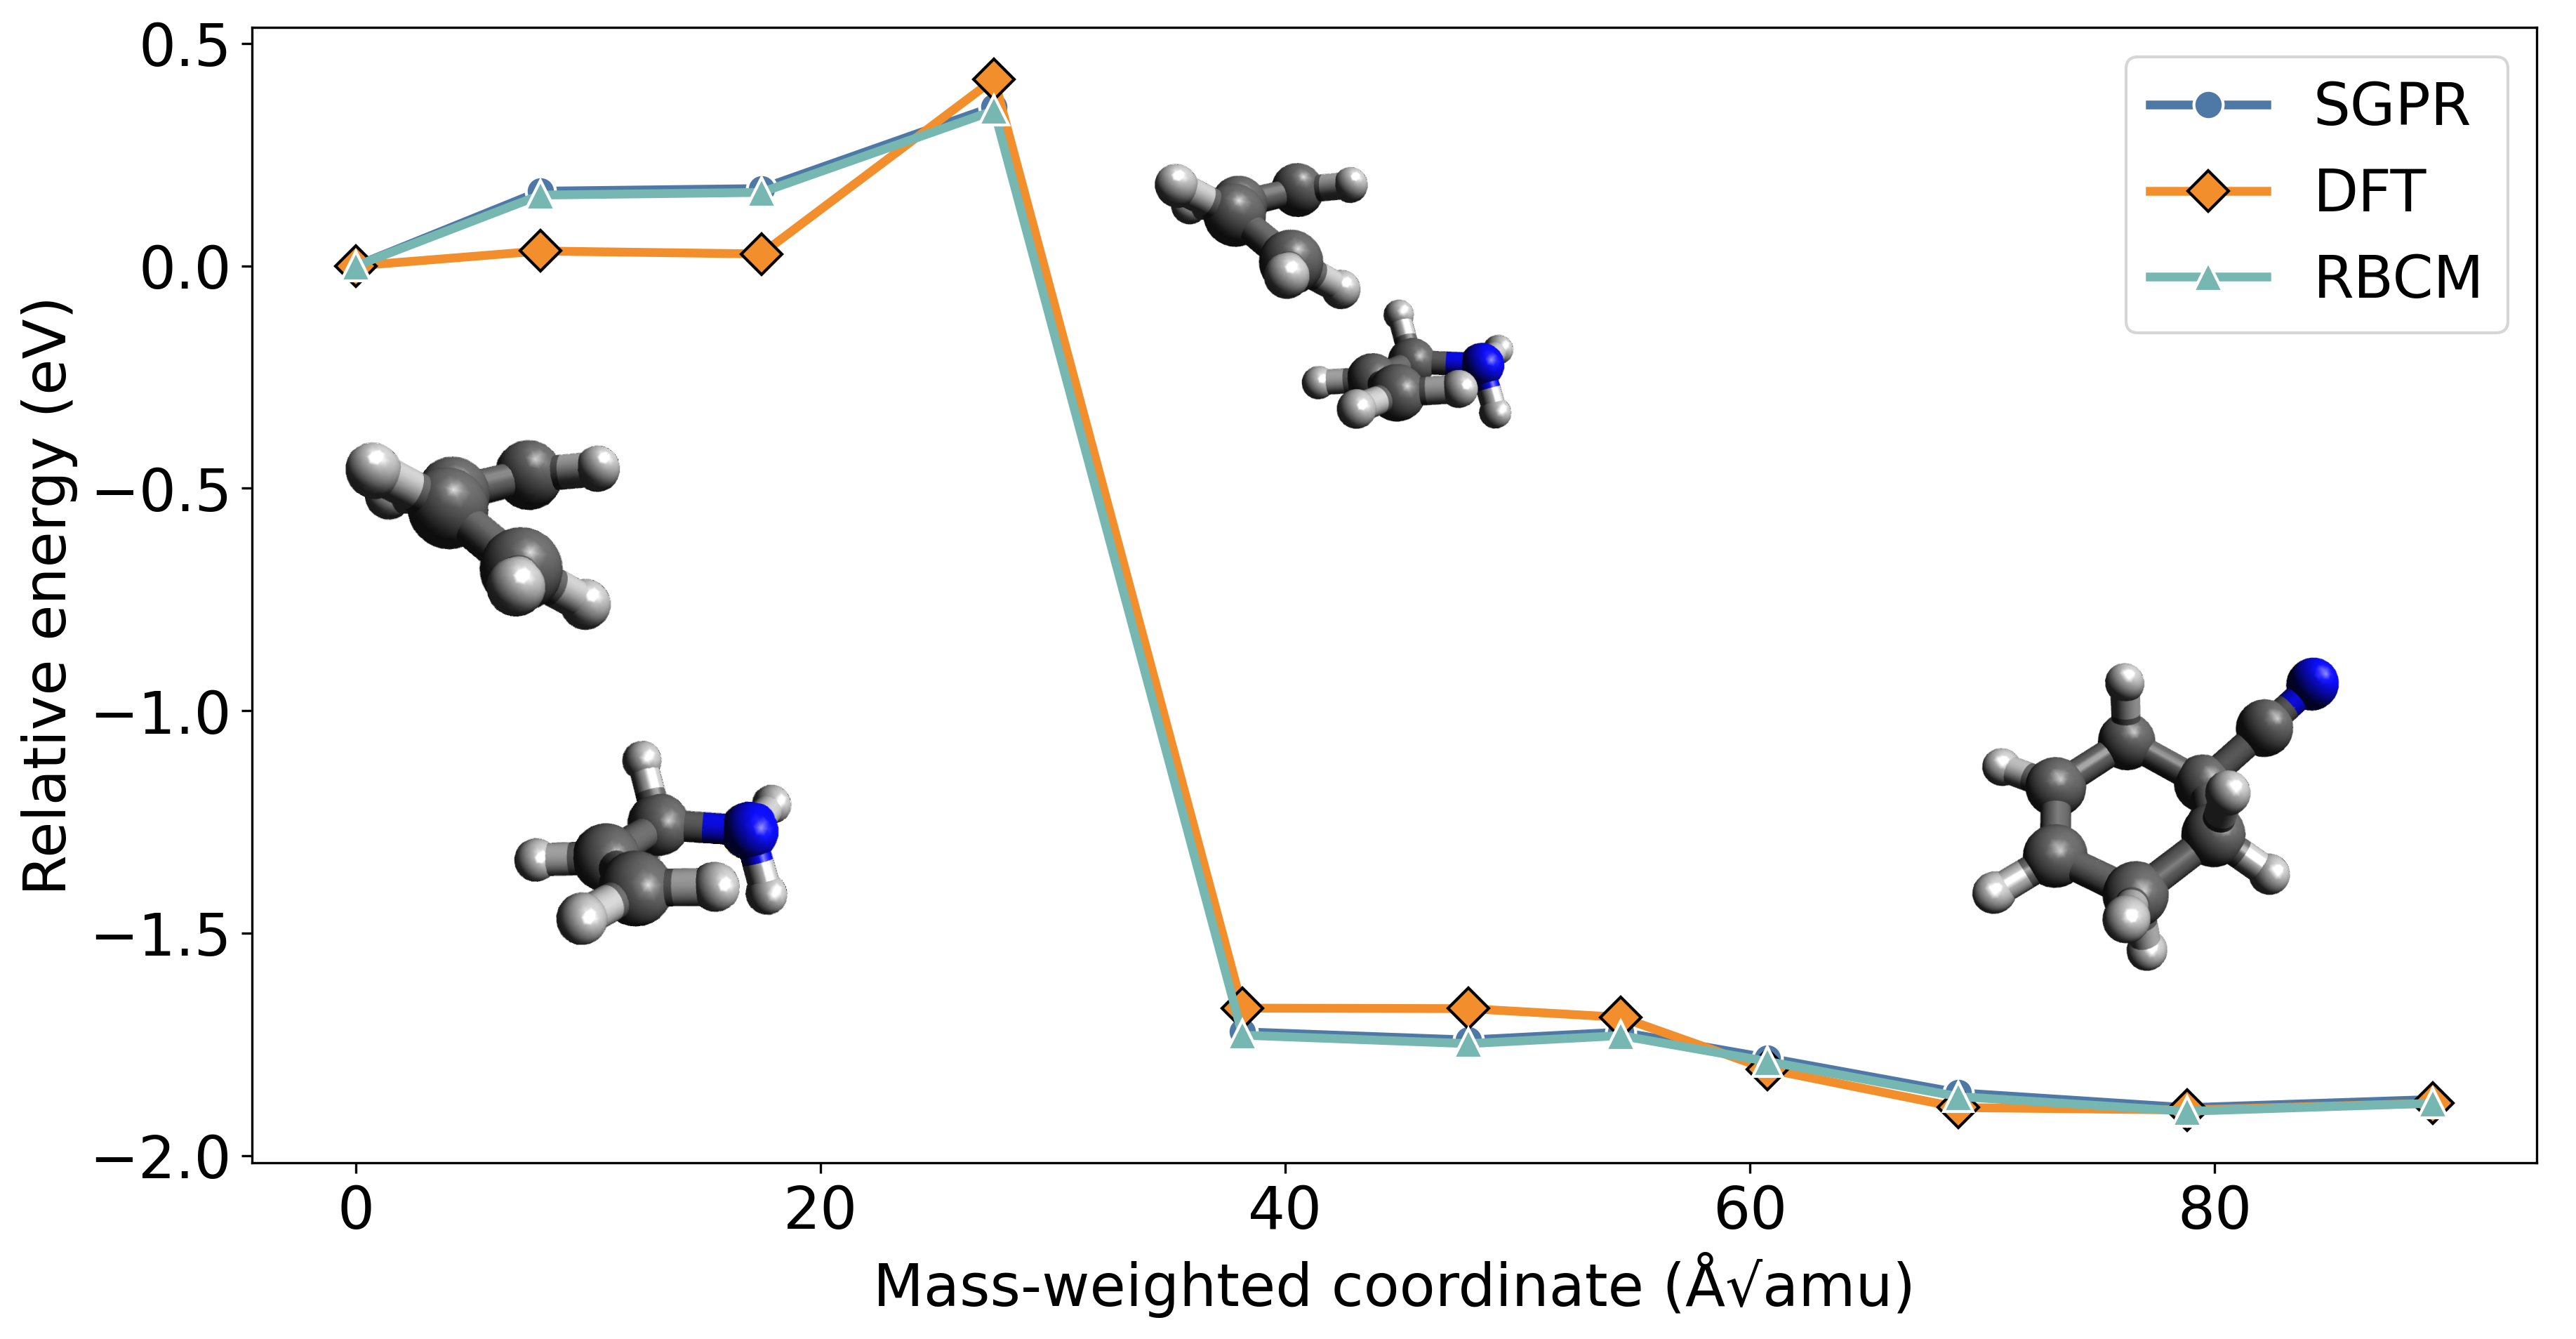

In [57]:
import os
import sys
import glob
import time
import numpy as np
from ase import Atoms, Atom
from ase.io import read, write, Trajectory
import matplotlib.pyplot as plt

new_directory = '../Data/Fig.4/a/DFT'
os.chdir(new_directory)


start_dir = '.'
file_pattern = f'OUTCAR*'
file_paths = []
for root, dirs, files in os.walk(start_dir):
    for file in glob.glob(os.path.join(root, file_pattern)):
        if 'idm' not in file and 're' not in file and 'zpe' not in file and 'sp' not in file:
            file_paths += [file]
file_paths.sort(key=lambda path: int(path.split('/')[1]))

energies = []
print(' ')
for file in file_paths:
    OUTCAR = open(file)
    outcar = OUTCAR.readlines()
    print(' ###',file)
    for line in range(len(outcar)):
        if 'sigma' in outcar[-line]:
            energies += [float(outcar[-line].split()[-1])]
            break
print(' ',energies)


print(f'\n - Are you going to plot a graph including the energies of the initial state and the final state?')
whether = input(' -- yes/no? :  ')
try:
    if whether == 'yes' or whether == 'y' or type(float(whether)) == float or type(int(whether)) == int:
        initial = input(' --- Enter energy of initial state (eV) (float or int) :  ')
        final = input(' --- Enter energy of final state   (eV) (float or int) :  ')
        energies.insert(0, float(initial))
        energies.append(float(final))
        init_state = '00/POSCAR'
        init_index = 0
except:
    init_state = '01/CONTCAR'
    init_index = 1
print('\n',energies)

max_energy = max(energies)
max_index = energies.index(max_energy)
try:
    min_energy = min(energies[0:max_index]) 
except:
    min_energy = energies[0]
min_index = energies.index(min_energy)
E_a = max_energy - min_energy

# Mass-weighted Cartesian coordinates
mwcc_list = [0]
for i in range(len(energies)-1):
    try:
        file1_path = f'{i+1+init_index:02}/CONTCAR' 
        atoms1 = read(file1_path)
    except:
        file1_path = f'{i+1+init_index:02}/POSCAR' 
        atoms1 = read(file1_path)
    try:
        file2_path = f'{i+init_index:02}/CONTCAR' 
        atoms2 = read(file2_path)
    except:
        file2_path = f'{i+init_index:02}/POSCAR' 
        atoms2 = read(file2_path)
    pos1 = atoms1.get_positions().copy()
    pos2 = atoms2.get_positions().copy()
    cell = atoms1.get_cell().copy()
    mwcc = 0
    for j in range(len(pos1)):
        dx2 = (pos1[j][0] - pos2[j][0])**2
        dy2 = (pos1[j][1] - pos2[j][1])**2
        dz2 = (pos1[j][2] - pos2[j][2])**2
        
        for k in range(3):
            for l in [-1, 1]:
                adj_pos2 = pos2[j] + (l*cell[k])
                dx2_a = (pos1[j][0] - adj_pos2[0])**2
                dy2_a = (pos1[j][1] - adj_pos2[1])**2
                dz2_a = (pos1[j][2] - adj_pos2[2])**2
                if dx2_a < dx2 or dy2_a < dy2 or dz2_a < dz2:
                    dx2 = dx2_a
                    dy2 = dy2_a
                    dz2 = dz2_a
        mwcc += np.sqrt(atoms1[j].mass * (dx2 + dy2 + dz2))
    mwcc_list += [mwcc]
mwcc_list = np.cumsum(mwcc_list)



# -101.890 -103.813
energies = [-101.90625964924551,
            -101.73851605316437,
            -101.73265493472852,
            -101.54821557363309,
            -103.62763907572068,
            -103.64616501143016,
            -103.62837792744673,
            -103.68629474004544,
            -103.76470008304156,
            -103.79818572660722,
            -103.77987138738669
            ]





x = np.arange(0, len(energies), 1)
adj_enes = [energies[i]-energies[0] for i in range(len(energies))]





start_dir = '.'
file_pattern = f'OUTCAR*'
file_paths = []
for root, dirs, files in os.walk(start_dir):
    for file in glob.glob(os.path.join(root, file_pattern)):
        if 'idm' not in file and 're' not in file and 'zpe' not in file and 'sp' not in file:
            file_paths += [file]
file_paths.sort(key=lambda path: int(path.split('/')[1]))

energies = []
print(' ')
for file in file_paths:
    OUTCAR = open(file)
    outcar = OUTCAR.readlines()
    print(' ###',file)
    for line in range(len(outcar)):
        if 'sigma' in outcar[-line]:
            energies += [float(outcar[-line].split()[-1])]
            break
print(' ',energies)


print(f'\n - Are you going to plot a graph including the energies of the initial state and the final state?')
whether = input(' -- yes/no? :  ')
try:
    if whether == 'yes' or whether == 'y' or type(float(whether)) == float or type(int(whether)) == int:
        initial = input(' --- Enter energy of initial state (eV) (float or int) :  ')
        final = input(' --- Enter energy of final state   (eV) (float or int) :  ')
        energies.insert(0, float(initial))
        energies.append(float(final))
        init_state = '00/POSCAR'
        init_index = 0
except:
    init_state = '01/CONTCAR'
    init_index = 1
print('\n',energies)

max_energy = max(energies)
max_index = energies.index(max_energy)
try:
    min_energy = min(energies[0:max_index]) 
except:
    min_energy = energies[0]
min_index = energies.index(min_energy)
E_a = max_energy - min_energy

# Mass-weighted Cartesian coordinates
mwcc_list3 = [0]
for i in range(len(energies)-1):
    try:
        file1_path = f'{i+1+init_index:02}/CONTCAR'
        atoms1 = read(file1_path)
    except:
        file1_path = f'{i+1+init_index:02}/POSCAR'
        atoms1 = read(file1_path)
    try:
        file2_path = f'{i+init_index:02}/CONTCAR' 
        atoms2 = read(file2_path)
    except:
        file2_path = f'{i+init_index:02}/POSCAR' 
        atoms2 = read(file2_path)
    pos1 = atoms1.get_positions().copy()
    pos2 = atoms2.get_positions().copy()
    cell = atoms1.get_cell().copy()
    mwcc = 0
    for j in range(len(pos1)):
        dx2 = (pos1[j][0] - pos2[j][0])**2
        dy2 = (pos1[j][1] - pos2[j][1])**2
        dz2 = (pos1[j][2] - pos2[j][2])**2
       
        for k in range(3):
            for l in [-1, 1]:
                adj_pos2 = pos2[j] + (l*cell[k])
                dx2_a = (pos1[j][0] - adj_pos2[0])**2
                dy2_a = (pos1[j][1] - adj_pos2[1])**2
                dz2_a = (pos1[j][2] - adj_pos2[2])**2
                if dx2_a < dx2 or dy2_a < dy2 or dz2_a < dz2:
                    dx2 = dx2_a
                    dy2 = dy2_a
                    dz2 = dz2_a
        mwcc += np.sqrt(atoms1[j].mass * (dx2 + dy2 + dz2))
    mwcc_list3 += [mwcc]
mwcc_list3 = np.cumsum(mwcc_list3)



energies = [-101.898,
            -101.739,
            -101.733,
            -101.549,
            -103.627,
            -103.646,
            -103.628,
            -103.686,
            -103.765,
            -103.798,
            -103.780
            ]




x = np.arange(0, len(energies), 1)

adj_enes3 = [energies[i]-energies[0] for i in range(len(energies))]

start_dir = '.'
file_pattern = f'OUTCAR*'
file_paths = []
for root, dirs, files in os.walk(start_dir):
    for file in glob.glob(os.path.join(root, file_pattern)):
        if 'idm' not in file and 're' not in file and 'zpe' not in file and 'sp' not in file:
            file_paths += [file]
file_paths.sort(key=lambda path: int(path.split('/')[1]))


energies = []
print(' ')
for file in file_paths:
    OUTCAR = open(file)
    outcar = OUTCAR.readlines()
    print(' ###',file)
    for line in range(len(outcar)):
        if 'sigma' in outcar[-line]:
            energies += [float(outcar[-line].split()[-1])]
            break
print(' ',energies)



print(f'\n - Are you going to plot a graph including the energies of the initial state and the final state?')
whether = input(' -- yes/no? :  ')
try:
    if whether == 'yes' or whether == 'y' or type(float(whether)) == float or type(int(whether)) == int:
        initial = input(' --- Enter energy of initial state (eV) (float or int) :  ')
        final = input(' --- Enter energy of final state   (eV) (float or int) :  ')
        energies.insert(0, float(initial))
        energies.append(float(final))
        init_state = '00/POSCAR'
        init_index = 0
except:
    init_state = '01/CONTCAR'
    init_index = 1
print('\n',energies)

max_energy = max(energies)
max_index = energies.index(max_energy)
try:
    min_energy = min(energies[0:max_index]) 
except:
    min_energy = energies[0]
min_index = energies.index(min_energy)
E_a = max_energy - min_energy

# Mass-weighted Cartesian coordinates
mwcc_list2 = [0]
for i in range(len(energies)-1):
    try:
        file1_path = f'{i+1+init_index:02}/CONTCAR' 
        atoms1 = read(file1_path)
    except:
        file1_path = f'{i+1+init_index:02}/POSCAR'
        atoms1 = read(file1_path)
    try:
        file2_path = f'{i+init_index:02}/CONTCAR'
        atoms2 = read(file2_path)
    except:
        file2_path = f'{i+init_index:02}/POSCAR'
        atoms2 = read(file2_path)
    pos1 = atoms1.get_positions().copy()
    pos2 = atoms2.get_positions().copy()
    cell = atoms1.get_cell().copy()
    mwcc = 0
    for j in range(len(pos1)):
        dx2 = (pos1[j][0] - pos2[j][0])**2
        dy2 = (pos1[j][1] - pos2[j][1])**2
        dz2 = (pos1[j][2] - pos2[j][2])**2
      
        for k in range(3):
            for l in [-1, 1]:
                adj_pos2 = pos2[j] + (l*cell[k])
                dx2_a = (pos1[j][0] - adj_pos2[0])**2
                dy2_a = (pos1[j][1] - adj_pos2[1])**2
                dz2_a = (pos1[j][2] - adj_pos2[2])**2
                if dx2_a < dx2 or dy2_a < dy2 or dz2_a < dz2:
                    dx2 = dx2_a
                    dy2 = dy2_a
                    dz2 = dz2_a
        mwcc += np.sqrt(atoms1[j].mass * (dx2 + dy2 + dz2))
    mwcc_list2 += [mwcc]
mwcc_list2 = np.cumsum(mwcc_list2)
adj_enes2 = [energies[i]-energies[0] for i in range(len(energies))]

fig, ax = plt.subplots(figsize=(14,7), dpi=300)
# ax.plot(mwcc_list3, adj_enes3, marker = 'o', markersize =12, color = 'green', mec = 'b', mfc = 'red', lw=3, label='BCM')
ax.plot(mwcc_list, adj_enes, marker='o', markersize=10, color='#4e79a7', mec='white', mfc='#4e79a7', lw=3, label='SGPR')
ax.plot(mwcc_list2, adj_enes2, marker='D', markersize=10, color='#f28e2b', mec='black', mfc='#f28e2b', lw=3, label='DFT')
ax.plot(mwcc_list3, adj_enes3, marker='^', markersize=10, color='#76b7b2', mec='white', mfc='#76b7b2', lw=3, label='RBCM')

ax.legend(fontsize = 20)

import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
inset_ax = inset_axes(ax, width="300%", height="300%", 
                      bbox_to_anchor=(-0.05, 0.3, 0.4, 0.2), 
                      bbox_transform=ax.transAxes, 
                      loc='center')

inset_ax2 = inset_axes(ax, width="150%", height="150%", 
                      bbox_to_anchor=(0.33, 0.55, 0.3, 0.3), 
                      bbox_transform=ax.transAxes, 
                      loc='center')


inset_ax3 = inset_axes(ax, width="140%", height="140%", 
                      bbox_to_anchor=(0.7, 0.15, 0.3, 0.3), 
                      bbox_transform=ax.transAxes, 
                      loc='center')



img  = mpimg.imread('../../images/Fig.4_a_1.png')  
img2 = mpimg.imread('../../images/Fig.4_a_2.png')
img3 = mpimg.imread('../../images/Fig.4_a_3.png')

inset_ax.imshow(img)
inset_ax2.imshow(img2)
inset_ax3.imshow(img3)

inset_ax.axis('off')  
inset_ax2.axis('off') 
inset_ax3.axis('off') 

ax.set_xlabel('Mass-weighted coordinate (\u212B√amu)', fontsize=20)
ax.set_ylabel('Relative energy (eV)', fontsize=20)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

plt.show()

In [55]:
pwd

'/Users/baghyeongyu/Data_CNH/Data/Fig.4'

In [56]:
cd ..

/Users/baghyeongyu/Data_CNH/Data


## Fig. 5(b)

 
 ### ./01/OUTCAR
 ### ./02/OUTCAR
 ### ./03/OUTCAR
 ### ./04/OUTCAR
 ### ./05/OUTCAR
 ### ./06/OUTCAR
 ### ./07/OUTCAR
 ### ./08/OUTCAR
 ### ./09/OUTCAR
  [-114.68942332, -114.68603582, -114.23246965, -116.17638647, -116.18637686, -116.18427557, -116.23625545, -116.34784936, -116.38994633]

 - Are you going to plot a graph including the energies of the initial state and the final state?

 [-114.68896616, -114.68942332, -114.68603582, -114.23246965, -116.17638647, -116.18637686, -116.18427557, -116.23625545, -116.34784936, -116.38994633, -116.32698879293467]
 
 ### ./01/OUTCAR
 ### ./02/OUTCAR
 ### ./03/OUTCAR
 ### ./04/OUTCAR
 ### ./05/OUTCAR
 ### ./06/OUTCAR
 ### ./07/OUTCAR
 ### ./08/OUTCAR
 ### ./09/OUTCAR
  [-114.68942332, -114.68603582, -114.23246965, -116.17638647, -116.18637686, -116.18427557, -116.23625545, -116.34784936, -116.38994633]

 - Are you going to plot a graph including the energies of the initial state and the final state?

 [-114.70339, -114.68942332, -114.6860358

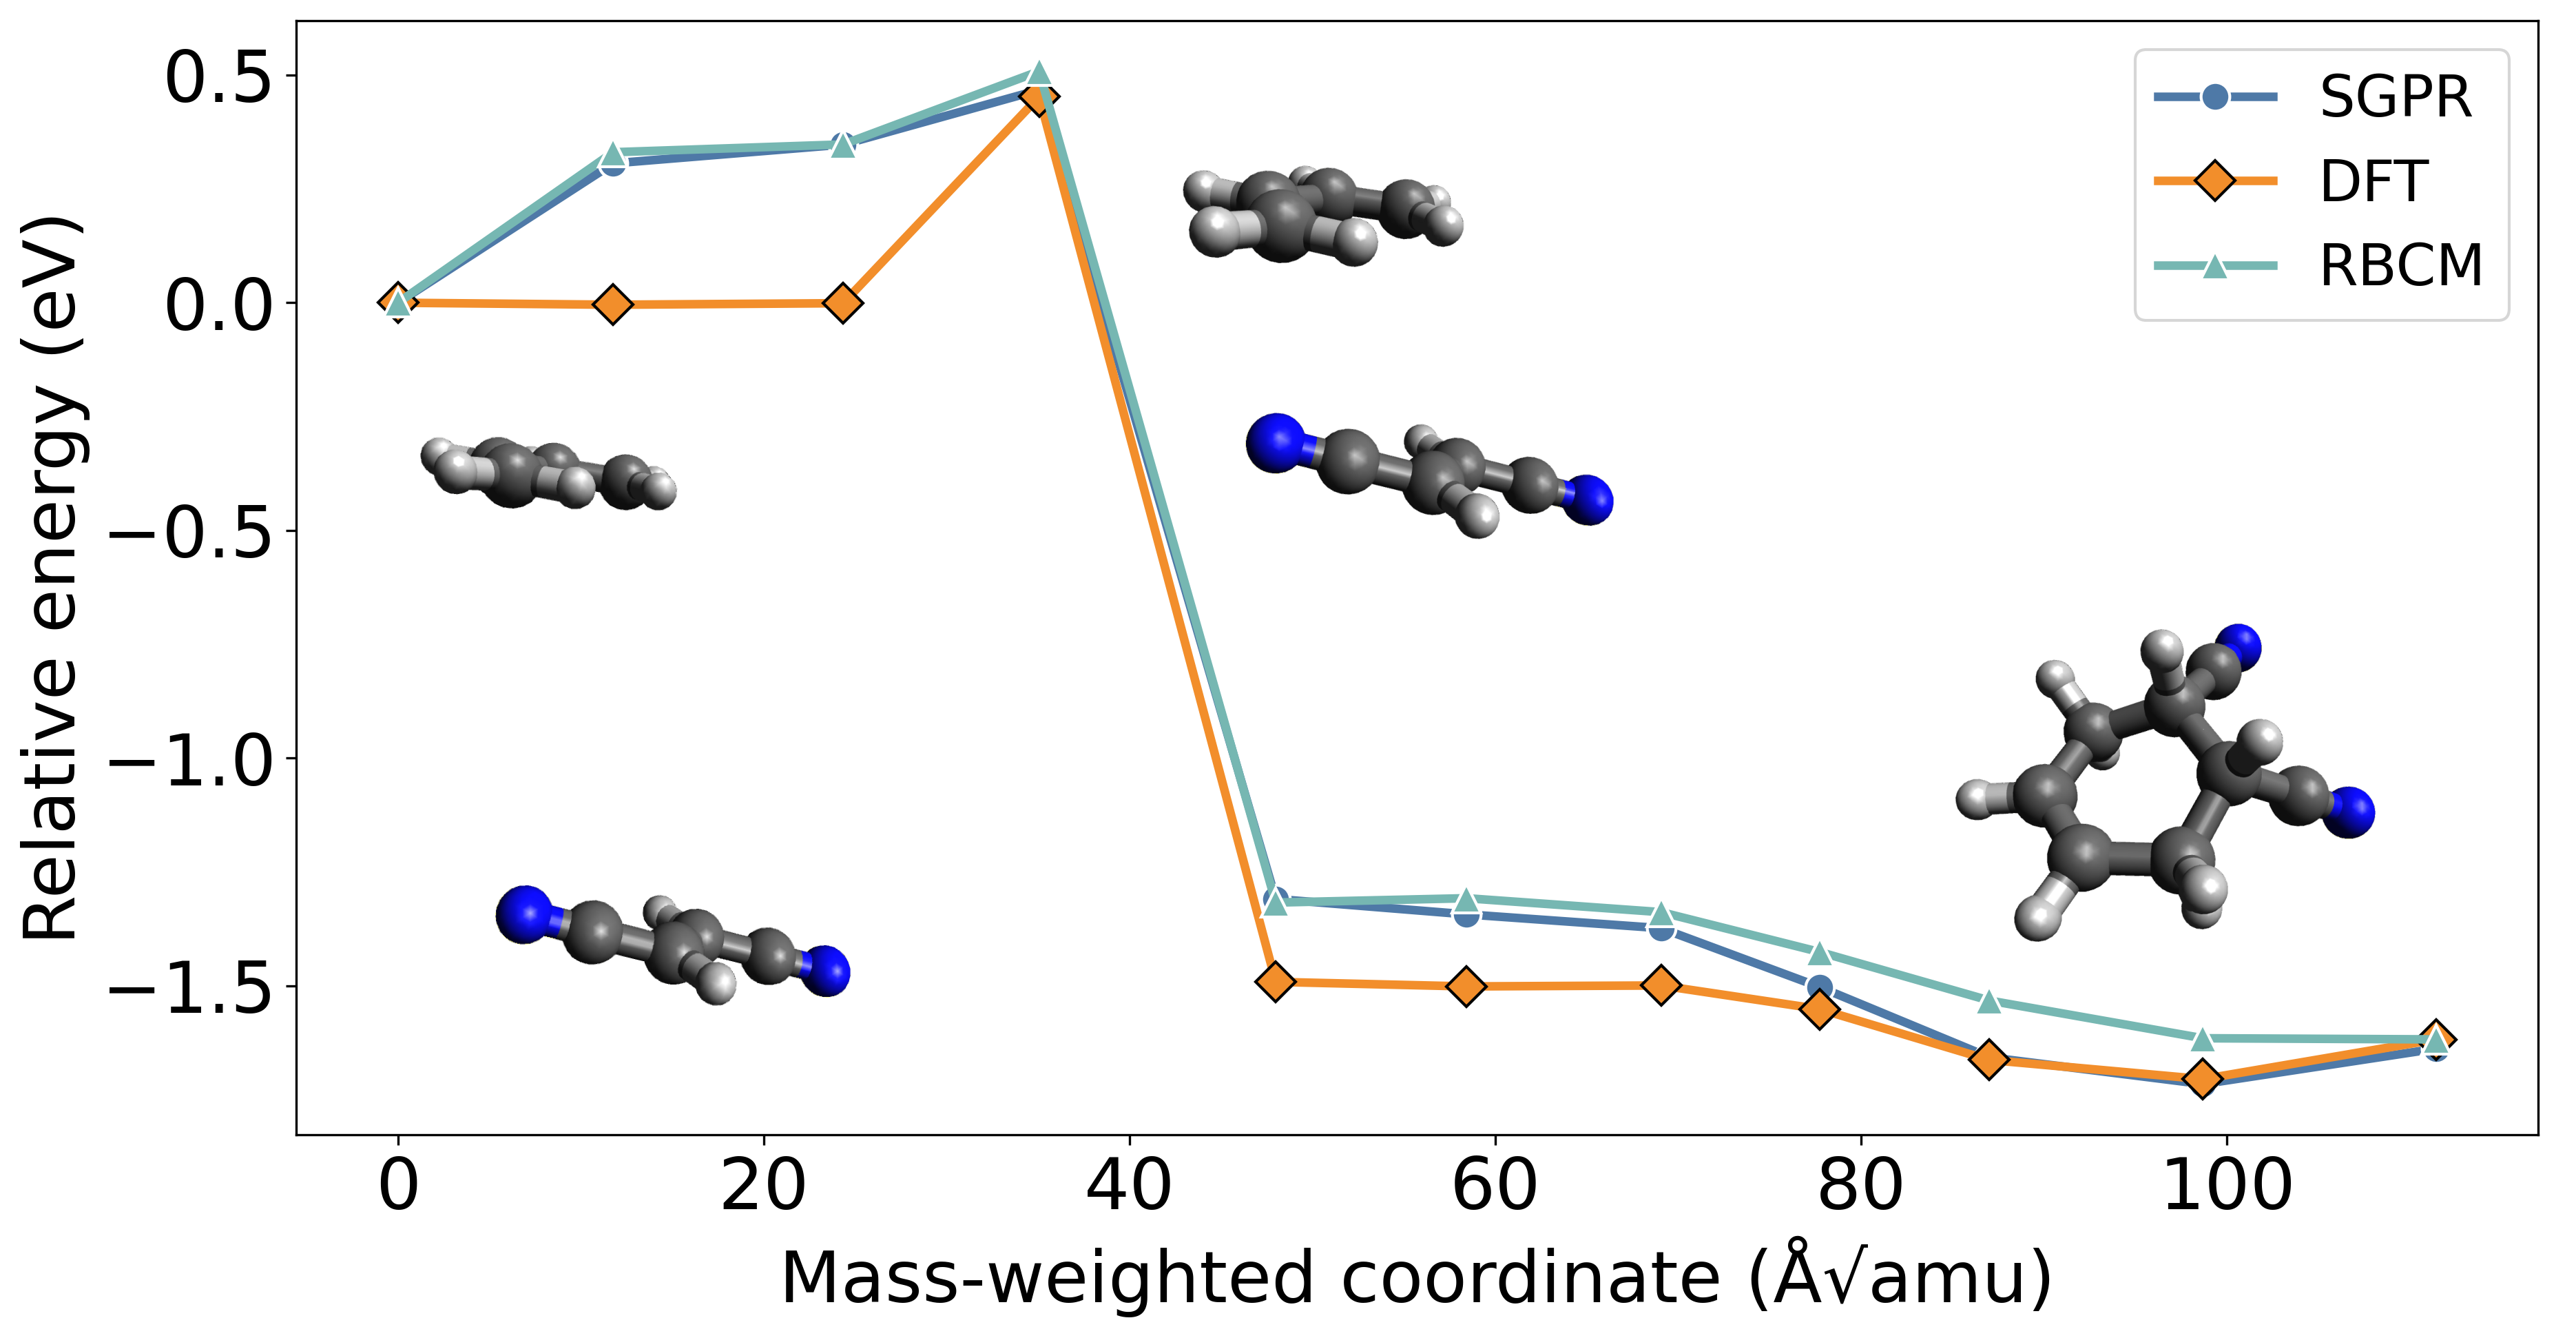

In [1]:
import os
import sys
import glob
import time
import numpy as np
from ase import Atoms, Atom
from ase.io import read, write, Trajectory
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

 
new_directory = '../Data/Fig.4/b/DFT'
os.chdir(new_directory)

start_dir = '.'
file_pattern = f'OUTCAR*'
file_paths = []
for root, dirs, files in os.walk(start_dir):
    for file in glob.glob(os.path.join(root, file_pattern)):
        if 'idm' not in file and 're' not in file and 'zpe' not in file and 'sp' not in file:
            file_paths += [file]
file_paths.sort(key=lambda path: int(path.split('/')[1]))


energies = []
print(' ')
for file in file_paths:
    OUTCAR = open(file)
    outcar = OUTCAR.readlines()
    print(' ###',file)
    for line in range(len(outcar)):
        if 'sigma' in outcar[-line]:
            energies += [float(outcar[-line].split()[-1])]
            break
print(' ',energies)


print(f'\n - Are you going to plot a graph including the energies of the initial state and the final state?')
whether = input(' -- yes/no? :  ')
try:
    if whether == 'yes' or whether == 'y' or type(float(whether)) == float or type(int(whether)) == int:
        initial = input(' --- Enter energy of initial state (eV) (float or int) :  ')
        final = input(' --- Enter energy of final state   (eV) (float or int) :  ')
        energies.insert(0, float(initial))
        energies.append(float(final))
        init_state = '00/POSCAR'
        init_index = 0
except:
    init_state = '01/CONTCAR'
    init_index = 1
print('\n',energies)

max_energy = max(energies)
max_index = energies.index(max_energy)
try:
    min_energy = min(energies[0:max_index]) 
except:
    min_energy = energies[0]
min_index = energies.index(min_energy)
E_a = max_energy - min_energy

# Mass-weighted Cartesian coordinates
mwcc_list = [0]
for i in range(len(energies)-1):
    try:
        file1_path = f'{i+1+init_index:02}/CONTCAR' 
        atoms1 = read(file1_path)
    except:
        file1_path = f'{i+1+init_index:02}/POSCAR' 
        atoms1 = read(file1_path)
    try:
        file2_path = f'{i+init_index:02}/CONTCAR' 
        atoms2 = read(file2_path)
    except:
        file2_path = f'{i+init_index:02}/POSCAR' 
        atoms2 = read(file2_path)
    pos1 = atoms1.get_positions().copy()
    pos2 = atoms2.get_positions().copy()
    cell = atoms1.get_cell().copy()
    mwcc = 0
    for j in range(len(pos1)):
        dx2 = (pos1[j][0] - pos2[j][0])**2
        dy2 = (pos1[j][1] - pos2[j][1])**2
        dz2 = (pos1[j][2] - pos2[j][2])**2
        # Try pbc
        for k in range(3):
            for l in [-1, 1]:
                adj_pos2 = pos2[j] + (l*cell[k])
                dx2_a = (pos1[j][0] - adj_pos2[0])**2
                dy2_a = (pos1[j][1] - adj_pos2[1])**2
                dz2_a = (pos1[j][2] - adj_pos2[2])**2
                if dx2_a < dx2 or dy2_a < dy2 or dz2_a < dz2:
                    dx2 = dx2_a
                    dy2 = dy2_a
                    dz2 = dz2_a
        mwcc += np.sqrt(atoms1[j].mass * (dx2 + dy2 + dz2))
    mwcc_list += [mwcc]
mwcc_list = np.cumsum(mwcc_list)



# #dft
# -.11470339E+03 
# -.11640647E+03
energies = [-114.68896616,
            -114.38289720188196,
            -114.34160036216791,
            -114.22166041001047,
            -115.99832290266941,
            -116.03211781331639,
            -116.06242785691585,
            -116.19168607793118,
            -116.34601849313195,
            -116.40475773760419,
            -116.32698879293467
             ]




x = np.arange(0, len(energies), 1)
adj_enes = [energies[i]-energies[0] for i in range(len(energies))]



############################################################################################
start_dir = '.'
file_pattern = f'OUTCAR*'
file_paths = []
for root, dirs, files in os.walk(start_dir):
    for file in glob.glob(os.path.join(root, file_pattern)):
        if 'idm' not in file and 're' not in file and 'zpe' not in file and 'sp' not in file:
            file_paths += [file]
file_paths.sort(key=lambda path: int(path.split('/')[1]))

energies = []
print(' ')
for file in file_paths:
    OUTCAR = open(file)
    outcar = OUTCAR.readlines()
    print(' ###',file)
    for line in range(len(outcar)):
        if 'sigma' in outcar[-line]:
            energies += [float(outcar[-line].split()[-1])]
            break
print(' ',energies)
print(f'\n - Are you going to plot a graph including the energies of the initial state and the final state?')
whether = input(' -- yes/no? :  ')
try:
    if whether == 'yes' or whether == 'y' or type(float(whether)) == float or type(int(whether)) == int:
        initial = input(' --- Enter energy of initial state (eV) (float or int) :  ')
        final = input(' --- Enter energy of final state   (eV) (float or int) :  ')
        energies.insert(0, float(initial))
        energies.append(float(final))
        init_state = '00/POSCAR'
        init_index = 0
except:
    init_state = '01/CONTCAR'
    init_index = 1
print('\n',energies)

max_energy = max(energies)
max_index = energies.index(max_energy)
try:
    min_energy = min(energies[0:max_index])
except:
    min_energy = energies[0]
min_index = energies.index(min_energy)
E_a = max_energy - min_energy


# Mass-weighted Cartesian coordinates
mwcc_list3 = [0]
for i in range(len(energies)-1):
    try:
        file1_path = f'{i+1+init_index:02}/CONTCAR' 
        atoms1 = read(file1_path)
    except:
        file1_path = f'{i+1+init_index:02}/POSCAR' 
        atoms1 = read(file1_path)
    try:
        file2_path = f'{i+init_index:02}/CONTCAR' 
        atoms2 = read(file2_path)
    except:
        file2_path = f'{i+init_index:02}/POSCAR' 
        atoms2 = read(file2_path)
    pos1 = atoms1.get_positions().copy()
    pos2 = atoms2.get_positions().copy()
    cell = atoms1.get_cell().copy()
    mwcc = 0
    for j in range(len(pos1)):
        dx2 = (pos1[j][0] - pos2[j][0])**2
        dy2 = (pos1[j][1] - pos2[j][1])**2
        dz2 = (pos1[j][2] - pos2[j][2])**2
        
        for k in range(3):
            for l in [-1, 1]:
                adj_pos2 = pos2[j] + (l*cell[k])
                dx2_a = (pos1[j][0] - adj_pos2[0])**2
                dy2_a = (pos1[j][1] - adj_pos2[1])**2
                dz2_a = (pos1[j][2] - adj_pos2[2])**2
                if dx2_a < dx2 or dy2_a < dy2 or dz2_a < dz2:
                    dx2 = dx2_a
                    dy2 = dy2_a
                    dz2 = dz2_a
        mwcc += np.sqrt(atoms1[j].mass * (dx2 + dy2 + dz2))
    mwcc_list3 += [mwcc]
mwcc_list3 = np.cumsum(mwcc_list3)

energies = [-114.685,
            -114.35449670845708,
            -114.33743234941801,
            -114.1767159303098,
            -116.00221925912487,
            -115.99268302539429,
            -116.0231912930875,
            -116.11082073891599,
            -116.21742065562,
            -116.30018744556298,
            -116.30267718838593]




x = np.arange(0, len(energies), 1)
adj_enes3 = [energies[i]-energies[0] for i in range(len(energies))]

############################################################################################
start_dir = '.'
file_pattern = f'OUTCAR*'
file_paths = []
for root, dirs, files in os.walk(start_dir):
    for file in glob.glob(os.path.join(root, file_pattern)):
        if 'idm' not in file and 're' not in file and 'zpe' not in file and 'sp' not in file:
            file_paths += [file]
file_paths.sort(key=lambda path: int(path.split('/')[1]))



energies = []
print(' ')
for file in file_paths:
    OUTCAR = open(file)
    outcar = OUTCAR.readlines()
    print(' ###',file)
    for line in range(len(outcar)):
        if 'sigma' in outcar[-line]:
            energies += [float(outcar[-line].split()[-1])]
            break
print(' ',energies)



print(f'\n - Are you going to plot a graph including the energies of the initial state and the final state?')
whether = input(' -- yes/no? :  ')
try:
    if whether == 'yes' or whether == 'y' or type(float(whether)) == float or type(int(whether)) == int:
        initial = input(' --- Enter energy of initial state (eV) (float or int) :  ')
        final = input(' --- Enter energy of final state   (eV) (float or int) :  ')
        energies.insert(0, float(initial))
        energies.append(float(final))
        init_state = '00/POSCAR'
        init_index = 0
except:
    init_state = '01/CONTCAR'
    init_index = 1
print('\n',energies)

max_energy = max(energies)
max_index = energies.index(max_energy)
try:
    min_energy = min(energies[0:max_index])
except:
    min_energy = energies[0]
min_index = energies.index(min_energy)
E_a = max_energy - min_energy

# Mass-weighted Cartesian coordinates
mwcc_list2 = [0]
for i in range(len(energies)-1):
    try:
        file1_path = f'{i+1+init_index:02}/CONTCAR' 
        atoms1 = read(file1_path)
    except:
        file1_path = f'{i+1+init_index:02}/POSCAR'
        atoms1 = read(file1_path)
    try:
        file2_path = f'{i+init_index:02}/CONTCAR' 
        atoms2 = read(file2_path)
    except:
        file2_path = f'{i+init_index:02}/POSCAR'
        atoms2 = read(file2_path)
    pos1 = atoms1.get_positions().copy()
    pos2 = atoms2.get_positions().copy()
    cell = atoms1.get_cell().copy()
    mwcc = 0
    for j in range(len(pos1)):
        dx2 = (pos1[j][0] - pos2[j][0])**2
        dy2 = (pos1[j][1] - pos2[j][1])**2
        dz2 = (pos1[j][2] - pos2[j][2])**2
        # Try pbc
        for k in range(3):
            for l in [-1, 1]:
                adj_pos2 = pos2[j] + (l*cell[k])
                dx2_a = (pos1[j][0] - adj_pos2[0])**2
                dy2_a = (pos1[j][1] - adj_pos2[1])**2
                dz2_a = (pos1[j][2] - adj_pos2[2])**2
                if dx2_a < dx2 or dy2_a < dy2 or dz2_a < dz2:
                    dx2 = dx2_a
                    dy2 = dy2_a
                    dz2 = dz2_a
        mwcc += np.sqrt(atoms1[j].mass * (dx2 + dy2 + dz2))
    mwcc_list2 += [mwcc]
mwcc_list2 = np.cumsum(mwcc_list2)
adj_enes2 = [energies[i]-energies[0] for i in range(len(energies))]

fig, ax = plt.subplots(figsize=(14,7), dpi=300)
ax.plot(mwcc_list, adj_enes, marker='o', markersize=10, color='#4e79a7', mec='white', mfc='#4e79a7', lw=3, label='SGPR')
ax.plot(mwcc_list2, adj_enes2, marker='D', markersize=10, color='#f28e2b', mec='black', mfc='#f28e2b', lw=3, label='DFT')
ax.plot(mwcc_list3, adj_enes3, marker='^', markersize=10, color='#76b7b2', mec='white', mfc='#76b7b2', lw=3, label='RBCM')

ax.legend(fontsize = 20)


from mpl_toolkits.axes_grid1.inset_locator import inset_axes
inset_ax = inset_axes(ax, width="300%", height="300%", 
                      bbox_to_anchor=(-0.05, 0.3, 0.4, 0.2), 
                      bbox_transform=ax.transAxes, 
                      loc='center')
inset_ax2 = inset_axes(ax, width="150%", height="150%", 
                      bbox_to_anchor=(0.33, 0.55, 0.3, 0.3), 
                      bbox_transform=ax.transAxes, 
                      loc='center')
inset_ax3 = inset_axes(ax, width="140%", height="140%", 
                      bbox_to_anchor=(0.7, 0.15, 0.3, 0.3), 
                      bbox_transform=ax.transAxes, 
                      loc='center')



img = mpimg.imread('../../images/Fig.4_b_1.png') 
img2 = mpimg.imread('../../images/Fig.4_b_2.png')
img3 = mpimg.imread('../../images/Fig.4_b_3.png')

inset_ax.imshow(img)
inset_ax2.imshow(img2)
inset_ax3.imshow(img3)

inset_ax.axis('off')  
inset_ax2.axis('off') 
inset_ax3.axis('off') 

ax.set_xlabel('Mass-weighted coordinate (\u212B√amu)', fontsize=25)
ax.set_ylabel('Relative energy (eV)', fontsize=25)

ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)

plt.show()

In [65]:
cd ..

/Users/baghyeongyu/Data_CNH/Data


In [66]:
pwd

'/Users/baghyeongyu/Data_CNH/Data'